In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import glob
import scipy as scp

# Coverage of native space

In [2]:
chip2 = pd.read_csv('./sorted_by_1_minus_TMscore_chip2.tab')
chip1 = pd.read_csv('./sorted_by_1_minus_TMscore_chip1.tab')
chip1_covered_natives = pd.read_csv('./sorted_by_1_minus_TMscore_natives.tab')

In [3]:
natives_tmscores_df = pd.read_csv('./natives_one_minus_tmscores.csv',index_col=0)
natives_tmscores = 1 - natives_tmscores_df.index
natives_tmscores_av = np.average(natives_tmscores)
natives_tmscores_sd = np.std(natives_tmscores)

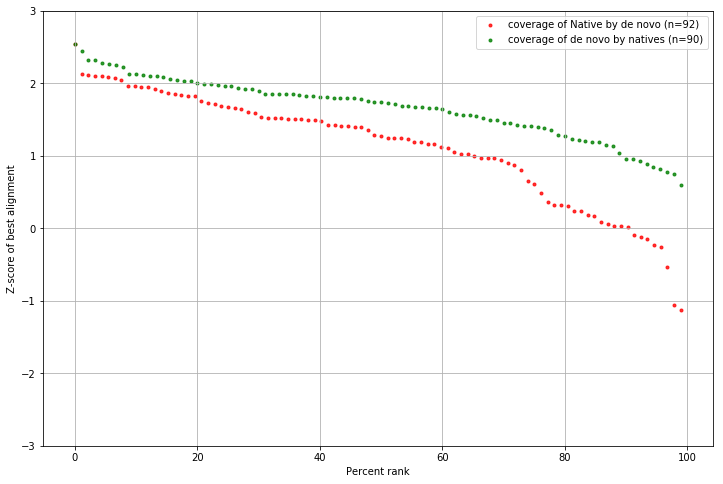

In [4]:
fig = plt.figure()
fig.set_size_inches( 12, 8)

denovo1_z_score = ((1-chip1.one_min_TMscore.values)-natives_tmscores_av)/natives_tmscores_sd
native1_z_score = ((1-chip1_covered_natives.one_min_TMscore.values)-natives_tmscores_av)/natives_tmscores_sd
sns.regplot(100*((np.array([i for i in chip1.index]))/92),denovo1_z_score,fit_reg=False,label='coverage of Native by de novo (n=92)',color='red',marker='.')
sns.regplot(100*((np.array([i for i in chip1_covered_natives.index]))/90),native1_z_score,fit_reg=False,label='coverage of de novo by natives (n=90)',color='green',marker='.')


plt.legend()
sns.set(font_scale=1.5)
sns.set_style("white")
plt.xlabel("Percent rank")
plt.ylabel("Z-score of best alignment")
plt.grid()
plt.ylim(-3.0,3.0)
plt.show()

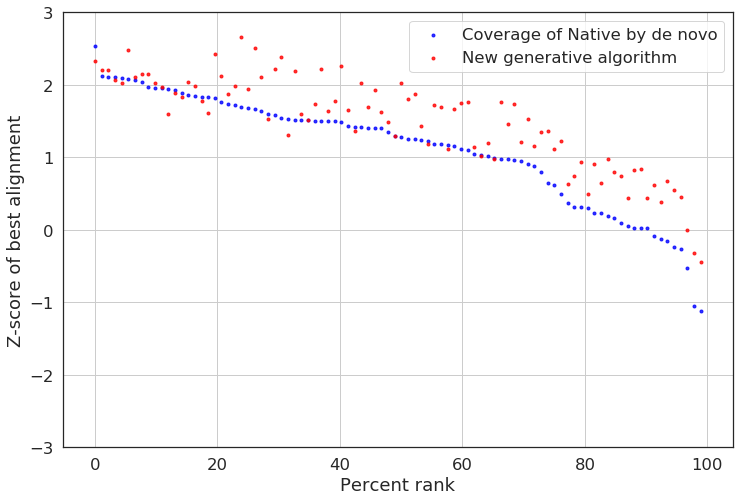

In [5]:
fig = plt.figure()
#fig.set_size_inches( 8, 5)
fig.set_size_inches( 12, 8)

sns.regplot(100*(np.array([i for i in chip1.index])/92),((1-np.array([i for i in chip1.one_min_TMscore]))-natives_tmscores_av)/natives_tmscores_sd,fit_reg=False,label='Coverage of Native by de novo',color='blue',marker='.')
sns.regplot(100*(np.array([i for i in chip1.index])/92),((1-np.array([chip2.where(chip2.native == i).dropna().one_min_TMscore.values[0] for i in chip1.native]))-natives_tmscores_av)/natives_tmscores_sd,fit_reg=False,label='New generative algorithm',color='red',marker='.')

plt.legend()
plt.xlabel("Percent rank")
plt.ylabel("Z-score of best alignment")
plt.grid()
plt.ylim(-3.0,3.0)
sns.set(font_scale=1.5)
sns.set_style("white")
plt.show()

# Native coverage of chip 2 and vice versa

In [6]:
chip2_covered_natives = pd.read_csv('./chip2_covered_natives_sorted_1_minus_TMscore.tab')

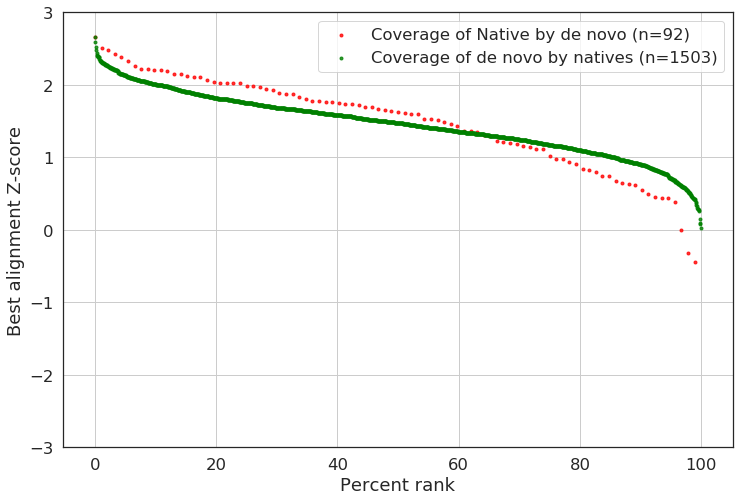

In [7]:
fig = plt.figure()
fig.set_size_inches( 12, 8)

denovo2_z_score = ((1-chip2.one_min_TMscore.values)-natives_tmscores_av)/natives_tmscores_sd
native2_z_score = ((1-chip2_covered_natives.one_min_TMscore.values)-natives_tmscores_av)/natives_tmscores_sd

sns.regplot(100*((np.array([i for i in chip2.index]))/92),denovo2_z_score,fit_reg=False,label='Coverage of Native by de novo (n=92)',color='red',marker='.')
sns.regplot(100*((np.array([i for i in chip2_covered_natives.index]))/1503),native2_z_score,fit_reg=False,label='Coverage of de novo by natives (n=1503)',color='green',marker='.')
plt.legend()
sns.set(font_scale=1.5)
sns.set_style("white")
plt.xlabel("Percent rank")
plt.ylabel("Best alignment Z-score")
plt.grid()
plt.ylim(-3.0,3.0)
plt.show()

# Absolute diveristy, no trimmed loops

In [8]:
chip1_tmscores_df = pd.read_csv('./chip1_all_v_all_one_minus_TMscore.csv',index_col=0)#chip1_all_v_all_one_minus_TMscore.csv
chip1_tmscores = 1 - chip1_tmscores_df.index
chip2_tmscores_df = pd.read_csv('./chip2_all_v_all_one_minus_TMscore.csv',index_col=0)#chip2_all_v_all_one_minus_TMscore.csv
chip1_tmscores = 1 - chip1_tmscores_df.index
chip2_tmscores = 1 - chip2_tmscores_df.index
natives_tmscores_df = pd.read_csv('./nat_all_v_all_one_minus_TMscore.csv',index_col=0)#nat_all_v_all_one_minus_TMscore.csv
chip1_tmscores = 1 - chip1_tmscores_df.index
natives_tmscores = 1 - natives_tmscores_df.index

/software/conda/envs/jupyterhub/lib/python3.6/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


/software/conda/envs/jupyterhub/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


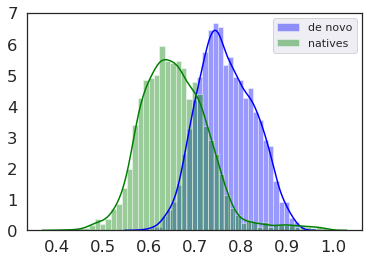

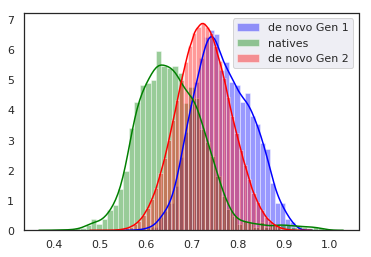

In [9]:
sns.set_style("white")
sns.distplot(chip1_tmscores,label="de novo",color='blue',norm_hist=False)
sns.distplot(natives_tmscores,label="natives",color='green',norm_hist=False)
sns.set(font_scale=1.0)
plt.legend()
plt.show()
sns.set_style("white")
sns.distplot(chip1_tmscores,label="de novo Gen 1",color='blue')
sns.distplot(natives_tmscores,label="natives",color='green')
sns.distplot(chip2_tmscores,label="de novo Gen 2",color='red')
sns.set(font_scale=1.0)
plt.legend()
plt.show()

# Absolute diveristy, native trimmed loops

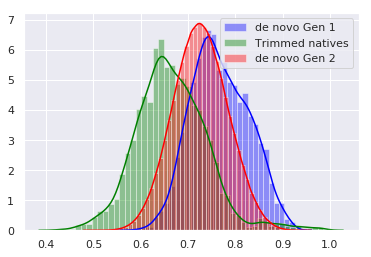

In [10]:
tnatives_tmscores_df = pd.read_csv('./trimmed_natives_one_minus_TMscore.csv',index_col=0)#trimmed_natives_one_minus_TMscore.cs
tnatives_tmscores = 1 - tnatives_tmscores_df.index

sns.distplot(chip1_tmscores,label="de novo Gen 1",color='blue')
sns.distplot(tnatives_tmscores,label="Trimmed natives",color='green')
sns.distplot(chip2_tmscores,label="de novo Gen 2",color='red')
plt.legend()
plt.show()

# Cluster maps of natives and chip 1 designs

In [11]:
distance_file = './chip1_allxall.txt'#
decoy_file = './chip1_decoys.txt'#chip1_decoys.txt
distances = np.fromfile(distance_file,sep=" ")
decoy_lines = open(decoy_file,'r')
decoys = [i[:-1] for i in decoy_lines.readlines()]
decoy_lines.close()
print("Done reading distances")
n_dec = len(decoys)
storage = np.zeros((n_dec,n_dec)) # make a big matrix full of zeros
ui_storage = np.triu_indices(n_dec,1) # get its upper triangle indices excluding diagonal
#li_storage = np.tril_indices(n_dec,-1)
storage[ui_storage] = distances # fill the upper triangle with the distances that were condensed
storage = storage + storage.transpose()
# Do the clustering
#distances_df = pd.DataFrame(distances,index=decoys)
linkage_mtx = scp.cluster.hierarchy.linkage(distances,method='complete')
#data = pd.DataFrame(storage, columns=decoys, index=decoys)
color_dict_subfam = {'4CDL_B5_CH':'indigo',\
                    '4CDL_B5_p':'deeppink',\
                    '4CDL_B7_CH':'teal',\
                    '4CDL_B7_p':'gold',\
                    'Mk1_withCH_parallel':'orange',\
                    'Mk1_withCH_per':'steelblue',\
                    'Mk1_noCH':'darkgray',\
                    'Mk2_no_CH':'green',\
                    'Mk1_TP':'indianred',\
                    '.ent':'black'}
colormap_test = []
for dec in decoys:
    subfam = [key for key in color_dict_subfam.keys() if key in dec ][0]
    colormap_test.append(color_dict_subfam[subfam])
#colormap_test = [ color_dict_subfam[key] if '.ent' in i else 'red' if 'Mk1' in i else 'black' for i in decoys]

Done reading distances


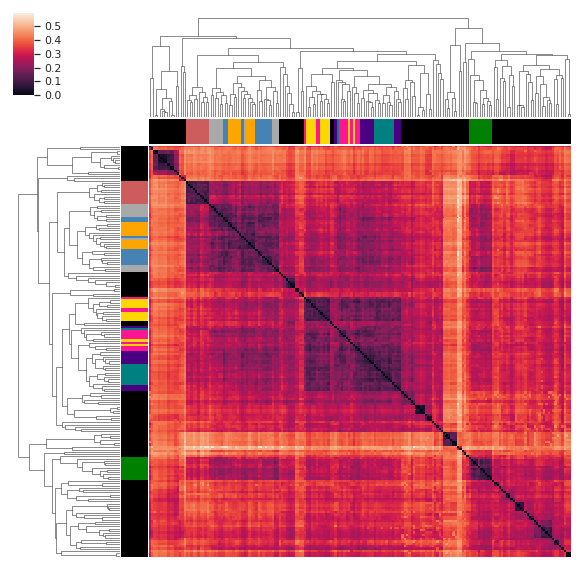

In [12]:
sns.clustermap(storage, row_linkage=linkage_mtx, \
               col_linkage=linkage_mtx,col_colors=colormap_test,\
               row_colors=colormap_test,yticklabels=False,xticklabels=False,figsize=(10, 10))


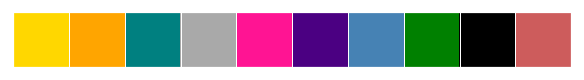

In [13]:
sns.palplot([i for i in set(colormap_test)],size=1)

# Cluster maps of natives and chip 2 designs

In [25]:
distance_file = '../Trees/chip2_vs_nat/allxall.txt'# chip2_allxall.txt
decoy_file = '../Trees/chip2_vs_nat/decoy_list.txt'# chip2_decoy_list.txt
distances = np.fromfile(distance_file,sep=" ")
decoy_lines = open(decoy_file,'r')
decoys = [i[:-1] for i in decoy_lines.readlines()]
decoy_lines.close()
print("Done reading distances")
n_dec = len(decoys)
storage = np.zeros((n_dec,n_dec)) # make a big matrix full of zeros
ui_storage = np.triu_indices(n_dec,1) # get its upper triangle indices excluding diagonal
#li_storage = np.tril_indices(n_dec,-1)
storage[ui_storage] = distances # fill the upper triangle with the distances that were condensed
storage = storage + storage.transpose()
# Do the clustering
#distances_df = pd.DataFrame(distances,index=decoys)
linkage_mtx = scp.cluster.hierarchy.linkage(distances,method='complete')
#data = pd.DataFrame(storage, columns=decoys, index=decoys)
colormap_test = ['r' if '.pdb' in i else 'g' for i in decoys]

Done reading distances


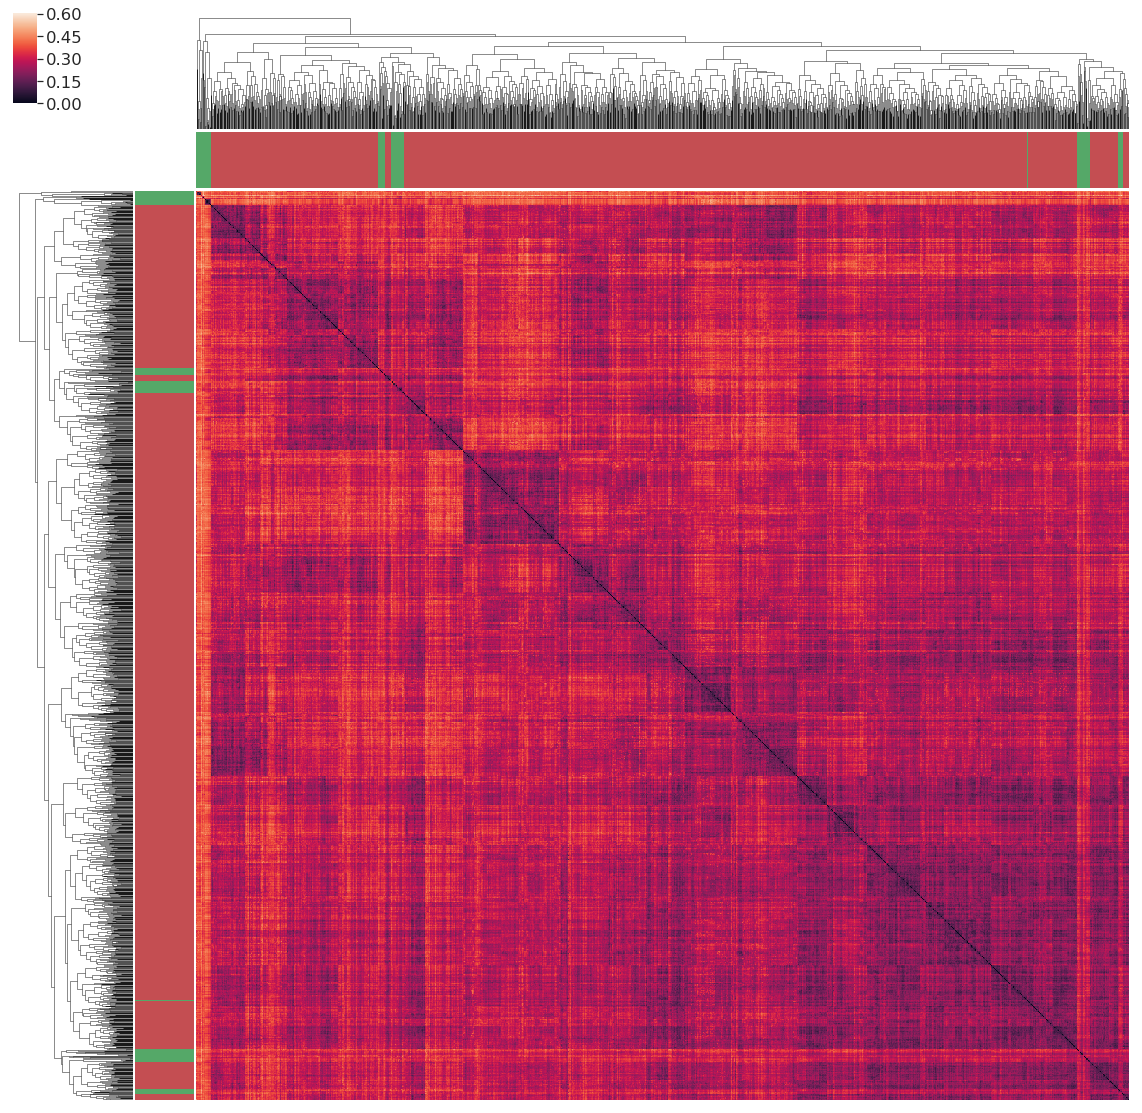

In [26]:
sns.clustermap(storage, row_linkage=linkage_mtx, \
               col_linkage=linkage_mtx,col_colors=colormap_test,\
               row_colors=colormap_test,yticklabels=False,xticklabels=False,figsize=(20, 20))